# Project 1: part f)-  Gradient Descent Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
import importlib

#from modelos import Dataframe, OLS
import modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

from scipy.optimize import fmin 
from autograd import grad

Functions for MSE, noise and create data.

In [2]:
def MSE(a, b, correction =True, axis=None):

    if correction:
        n = len(a) - 1
    else:
        n = len(a)

    return np.sum((a - b)**2, axis=axis)/(n + 0.00000000000001)

def noise(l, factor=1):
    return factor*np.random.normal(0,0.1,l) 


def create_data(n,min=-1,max=1, sort=True):
    
    if sort:
        x = np.sort(np.random.uniform(min,max,n))
    else:
        x = np.random.uniform(min,max,n)
    #y = np.random.uniform(0,1,n)
    return x


# Stochastic Gradient Descent

Optimization terminated successfully.
         Current function value: 9.000000
         Iterations: 23
         Function evaluations: 46
Minimum in x =  [-10.]


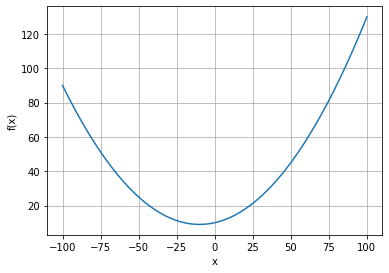

In [9]:
def f1d(x):

    a0 = 10.0
    a1 = 0.2
    a2 = 0.01
    return a0 + a1*x + a2*x**2 

def grad1d(x):
    a1 = 0.2
    a2 = 0.01
    return a1 + 2*a2*x 

g=0.6
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))
x = np.linspace(-100,100,200)
ax.plot(x,f1d(x))
#plt.title("f1d")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()

print("Minimum in x = ", fmin(f1d, 10))
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/f1d', dpi=300)

## Set up

We will study the differences between Plain GD and Plain GD with momentum using the same data. We will use the function
f1d with noise. As quantifier, we will use the number of iterations and the MSE.

We work with 400 datapoints and add noise. We can see this in the following plot.

Text(0, 0.5, 'f1d')

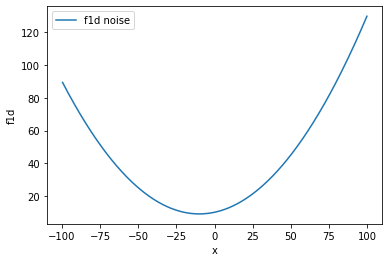

In [3]:
x =  create_data(1000, min=-100, max=+100, sort=True)
z = f1d(x)
#z = z0*(noise(len(x), factor=1) + 1)
data = modelos.Dataframe(x)
data.split(z)
#data2=data

feat_train = data.feature_matrix(data=data.x_train,n=3, scaling=True)
feat_test = data.feature_matrix(data=data.x_test, n=3, scaling=True)
y_train = data.y_train
y_test = data.y_test

fig, ax = plt.subplots(1)
#ax.plot(x,z0,label="f1d")
ax.plot(x, z, label="f1d noise")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("f1d")



Let's create both models, one for Plain GD and the other for Plain GD with momentum. We also set the learning rates, max_iterations, epsilon
and momentum for the momentum case.

In [11]:
importlib.reload(modelos) 
#Creation of the models
modelGD=modelos.OLS("GD")#Plain GD
modelGDM=modelos.OLS("GD")#Plain GD with momentum
modelMB=modelos.OLS("GD_MB")
modelMBM=modelos.OLS("GD_MB")

#Variables.
lr = 0.001 #learning rate
epsilon = 0.000000001 #error
max_iter=100000 # maximum iterations
beta0 = np.ones((3))*-5

momentum = 0.6

#now train
feat_train = data.feature_matrix(data=data.x_train,n=3, scaling=True)
feat_test = data.feature_matrix(data=data.x_test, n=3, scaling=True)
y_train = data.y_train
y_test = data.y_test

#modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter)
modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, sigma=momentum)
modelMB.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=70, n_epochs=130 )
#modelMBM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=70, n_epochs=10000, sigma=momentum )



hola
Time 0.33590006828308105 seconds
119 iterations done with grad. [-1.55182533e-10 -1.80307325e-10 -2.20893526e-10]. 
Time 0.14743781089782715 seconds
130 epochs done with grad. [ -35.93830058 -186.17307911  -11.14091397].


## Plain Gradient Descent vs Gradient Descent with momentum

Plain GD -> time/iter vs gamma

In [12]:
modelGD=modelos.OLS("GD")

#Variables.
lr = 0.001 #learning rate
epsilon = 0.000001 #error
max_iter=10000 # maximum iterations
beta0 = np.ones((3))*-5

modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter)


Time 0.38837575912475586 seconds
334 iterations done with grad. [-6.93093170e-07  3.34738957e-08  6.97175324e-07]. 


Different learning rates to try.

In [13]:
lr2 = np.arange(4.e-5, 1.e-4,1.e-5)
lr3 = np.arange(1.e-4, 1.e-3,1.e-4)
lr4 = np.arange(1.e-3, 2.e-3,1.e-3) 
l_rates = np.concatenate((lr2, lr3,lr4))


### Times and iter for Plain GD

In [14]:
importlib.reload(modelos) 
timesGD = np.zeros_like(l_rates)
itersGD = np.zeros_like(l_rates)

modelGD = modelos.OLS("GD")
for i, lr in enumerate(l_rates):
    modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter)
    timesGD[i] = modelGD.timeGD
    itersGD[i] = modelGD.iterGD


hola
Time 10.620434284210205 seconds
8584 iterations done with grad. [-7.03672754e-07  3.39828148e-08  7.07813797e-07]. 
Time 6.950305938720703 seconds
6865 iterations done with grad. [-7.04110221e-07  3.40083943e-08  7.08254220e-07]. 
Time 5.971634864807129 seconds
5719 iterations done with grad. [-7.04546892e-07  3.40237420e-08  7.08697712e-07]. 
Time 5.756168842315674 seconds
4901 iterations done with grad. [-7.03357500e-07  3.39672397e-08  7.07498771e-07]. 
Time 4.310077905654907 seconds
4287 iterations done with grad. [-7.03792466e-07  3.39911708e-08  7.07938625e-07]. 
Time 3.78371524810791 seconds
3810 iterations done with grad. [-7.02195621e-07  3.39132384e-08  7.06330866e-07]. 
Time 3.6535890102386475 seconds
3428 iterations done with grad. [-7.02221655e-07  3.39179564e-08  7.06360083e-07]. 
Time 1.791179895401001 seconds
1709 iterations done with grad. [-7.02454599e-07  3.39266535e-08  7.06590754e-07]. 
Time 1.1785309314727783 seconds
1136 iterations done with grad. [-7.026072

### Times and iter for GD momentum

In [15]:
m1 = np.array([0])
m2 = np.arange(0.01, 0.1, 0.01)
m3 = np.arange(0.1, 1, 0.1)
lr4 = np.arange(1.e-3, 2.e-3,1.e-3) 
momentum = np.concatenate((m1,m2, m3))

In [16]:
#momentum = np.arange(0.01,0.1,0.01)
timesGDM = np.zeros_like(momentum)
itersGDM = np.zeros_like(momentum)

for i, mom in enumerate(momentum):
    modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, sigma=mom)
    timesGDM[i] = modelGD.timeGD
    itersGDM[i] = modelGD.iterGD

Time 0.33016109466552734 seconds
334 iterations done with grad. [-6.93093170e-07  3.34738957e-08  6.97175324e-07]. 
Time 0.31910109519958496 seconds
331 iterations done with grad. [-6.66829578e-07  3.22056621e-08  6.70754275e-07]. 
Time 0.3305339813232422 seconds
327 iterations done with grad. [-6.80949938e-07  3.28868737e-08  6.84958991e-07]. 
Time 0.33480072021484375 seconds
323 iterations done with grad. [-6.95493213e-07  3.35916752e-08  6.99587986e-07]. 
Time 0.34974193572998047 seconds
320 iterations done with grad. [-6.67671429e-07  3.22475557e-08  6.71601356e-07]. 
Time 0.3675508499145508 seconds
316 iterations done with grad. [-6.81671168e-07  3.29222303e-08  6.85683517e-07]. 
Time 0.34715962409973145 seconds
312 iterations done with grad. [-6.96063694e-07  3.36177095e-08  7.00161877e-07]. 
Time 0.3650329113006592 seconds
309 iterations done with grad. [-6.66550136e-07  3.21910534e-08  6.70474719e-07]. 
Time 0.31084585189819336 seconds
305 iterations done with grad. [-6.8027316

In [17]:
gammas, delta = np.meshgrid(l_rates, momentum)
iter_mom = np.ones_like(gammas)

In [ ]:
for i in range(len(momentum)):
    for j in range(len(l_rates)):
        modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=l_rates[j], epsilon=epsilon, max_iters=max_iter, sigma=momentum[i])
        iter_mom[i,j] = modelGD.iterGD

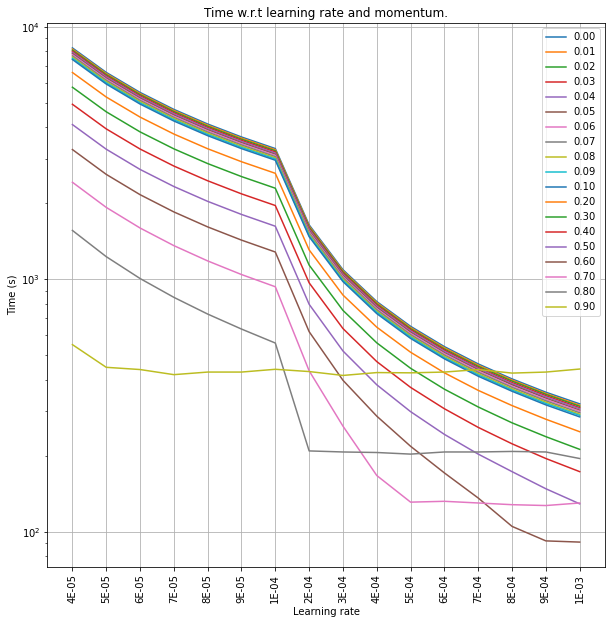

In [21]:
x = np.arange(0,len(l_rates),1)
ticks = ["{:.0E}".format(i) for i in l_rates]
legends = ["{:.2f}".format(i) for i in momentum]
fig, ax = plt.subplots(1, figsize=(10,10))
timey = np.arange(1,10,1)
for i in range(iter_mom.shape[0]):
    ax.plot(iter_mom[i,:])
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation = "vertical")
ax.set_xlabel("Learning rate", fontsize=10)
ax.set_ylabel("Time (s)", fontsize=10)

ko = [-1, 0.5, 0, 1]
#ax.set_yticks(ko)
#ax.set_yticklabels(ko)
ax.set_yscale("log")    
ax.legend(legends)
ax.set_title("Time w.r.t learning rate and momentum.")
ax.grid()

### Heatmap plot

I have to modify the number of momentum and learning rates to show depending the space on the reports

Text(147.13894736842104, 0.5, 'Momentum')

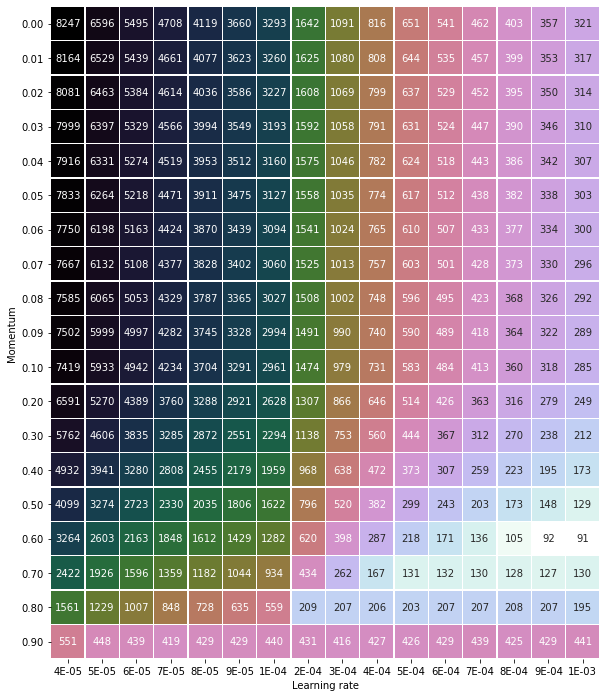

In [22]:
ticks = ["{:.0E}".format(i) for i in l_rates]
legends = ["{:.2f}".format(i) for i in momentum]
from matplotlib.colors import LogNorm, Normalize

#iter_mom = np.load("iter_momGDM.npy")
fig, ax = plt.subplots(1, figsize=(12,12))
ax = sns.heatmap(iter_mom, norm=LogNorm(),annot=True, fmt=".0f", linewidths=.3, cmap="cubehelix_r",cbar=False, square=True)
x = np.arange(0,6,1)
#ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Momentum")

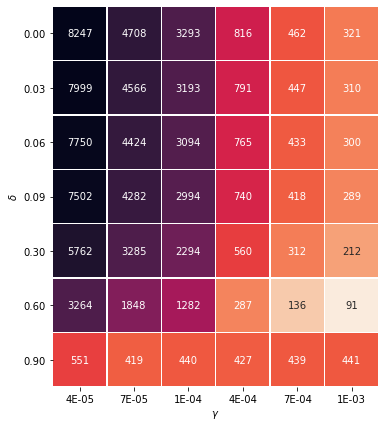

In [42]:
ticks = ["{:.0E}".format(i) for i in l_rates][::3]
legends = ["{:.2f}".format(i) for i in momentum][0::3]
from matplotlib.colors import LogNorm, Normalize

g=1
fig, ax = plt.subplots(1,1 ,figsize=(g*10,g*7))

#iter_mom = np.load("iter_momGDM.npy")
#fig, ax = plt.subplots(1, figsize=(12,12))
#ax = sns.heatmap(iter_mom[8:,::3], norm=LogNorm(),annot=True, fmt=".0f", linewidths=.3, cmap="rocket_r",cbar=False, square=True)
ax = sns.heatmap(iter_mom[0::3,::3], norm=LogNorm(),annot=True, fmt=".0f", linewidths=.3, cmap="rocket_r",cbar=False, square=True)
x = np.arange(0,6,1)
#ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation="0")
ax.set_yticklabels(legends, rotation="horizontal")
ax.set_xlabel("$\gamma$")
ax.set_ylabel("$\delta$")
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/GDvsGDM', dpi=300)
#sns.color_palette("mako", as_cmap=True)


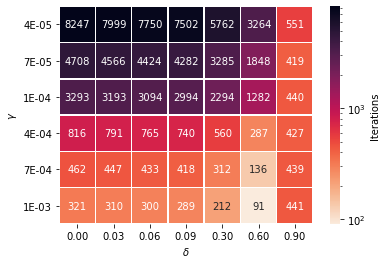

In [59]:
fig=sns.heatmap(iter_mom[0::3,::3].T, annot=True, fmt=".0f", linewidth=.5,norm=LogNorm(),
            yticklabels = ticks,
            xticklabels = legends, cmap='rocket_r',square=True,
            cbar_kws={'label':'Iterations'})
plt.yticks(rotation=0)
plt.ylabel("$\gamma$")
plt.xlabel("$\delta$")
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/GDvsGDM', dpi=300)

In [59]:
index = np.where(iter_mom == np.amin(iter_mom))
print(f"Lowe number of iterations achieved is {np.amin(iter_mom)} with momentum {momentum[index[0]]} and learning rate {l_rates[index[1]]}")

Lowe number of iterations achieved is 91.0 with momentum [0.6] and learning rate [0.001]


### Tunable learning rate
We try different schedulers for the learning rate.

In [66]:
modelMBM = modelos.OLS("GD_MB")
modelGDM = modelos.OLS("GD")
model = modelos.OLS()

lr = 0.001 #learning rate
momentum = 0.6
epsilon = 0.000001 #error
max_iter=10000 # maximum iterations
epochs=100
m_batches=4
tau = lr/100


modelMBM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,
mode="lr_exp" )
modelMBM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,
mode="lr_linear",gammatau=tau  )
modelMBM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,
mode="lr_inv",gammatau=tau  )
model.fit(feature_matrix=feat_train, y=y_train)


Time 0.009951114654541016 seconds
100 epochs done with grad. [-80.9332037  -12.12584593 -43.0351549 ].
Time 0.008341073989868164 seconds
100 epochs done with grad. [576.52769576 536.38788304 350.86659172].
Time 0.008282899856567383 seconds
100 epochs done with grad. [ 679.57938423 4196.5161989    88.57081106].


In [65]:
print(modelMBM.beta)
print(modelMBM.beta)
print(modelMBM.beta)


array([ 48.00911973,  47.93290268, -32.03317979])

In [254]:
x =  create_data(1000, min=-100, max=+100, sort=False)
z = f1d(x)
#z = z0*(noise(len(x), factor=1) + 1)
data = modelos.Dataframe(x)
#data.split(z)
#data2=data

#feat_train = data.feature_matrix(data=data.x_train,n=2, scaling=True)
#feat_test = data.feature_matrix(data=data.x_test, n=2, scaling=True)
#y_train = data.y_train
#y_test = data.y_test

feat_train = data.feature_matrix(data=data.data,n=3, scaling=True)
#feat_test = data.feature_matrix(data=data.data, n=2, scaling=True)
y_train = z
#y_test = data.y_test

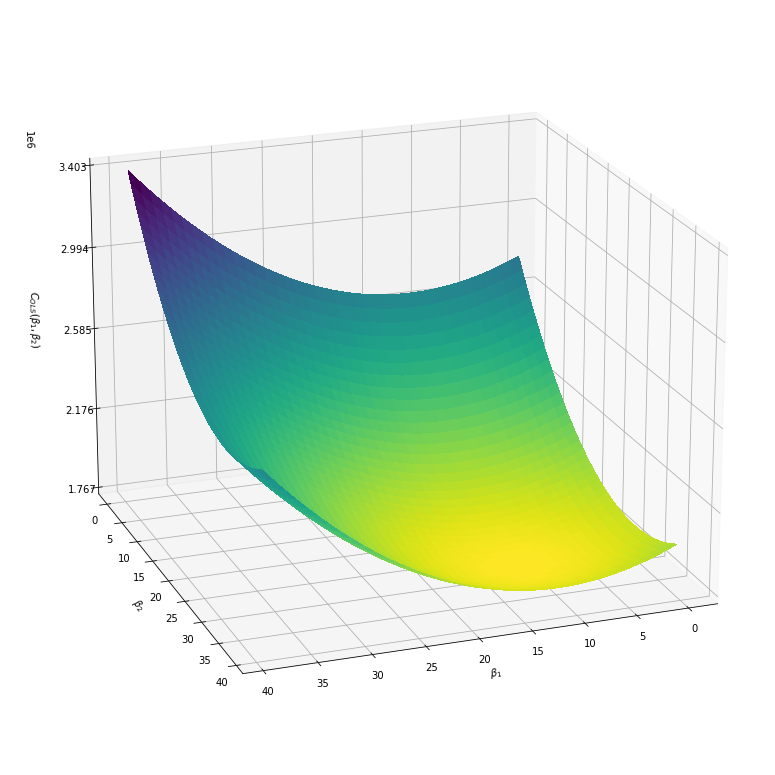

In [116]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
g=2
fig = plt.figure(figsize=(g*10,g*7))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,ans, cmap='viridis_r', antialiased=False)
#ax.plot_trisurf(X.flatten(),Y.flatten(), ans.flatten(), cmap='viridis_r')
ax.set_xlabel(r'$\beta_1$')
ax.set_ylabel(r'$\beta_2$')
ax.set_zlabel(r'$C_{OLS}(\beta_1,\beta_2)$',labelpad=20)
ax.zaxis.set_major_locator(LinearLocator(5))

#ax.zaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.view_init(elev=20, azim=70)
#plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/COLS3D', dpi=300)



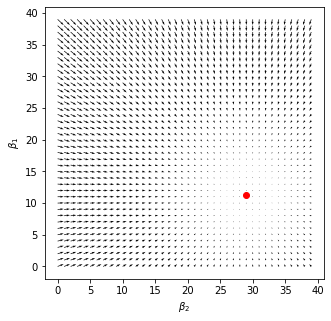

In [130]:
def nabla(beta, feat, y):

    return feat.T@(feat@beta - y[..., np.newaxis])

def Cols(beta, feat, y):

    aux=np.sum((y[..., np.newaxis] - feat@beta)**2,axis=0)
    return np.reshape(aux, Y.shape)

beta = np.arange(0,40,1)
X,Y =np.meshgrid(beta, beta)
flatX, flatY = X.flatten(), Y.flatten()
beta = np.stack((flatX, flatY), axis=0)
ans = nabla(beta, feat_train, y_train)
xans =  np.reshape(ans[0,:], Y.shape)
yans = np.reshape(ans[1,:], Y.shape)

g=0.5
plt.figure(figsize=(g*10,g*10))
#plt.quiver(X,Y,-xans,-yans)
plt.quiver(Y,X,-yans,-xans)
plt.xlabel(r'$\beta_2$')
plt.ylabel(r'$\beta_1$')
plt.scatter(28.934,11.238 ,color='r')

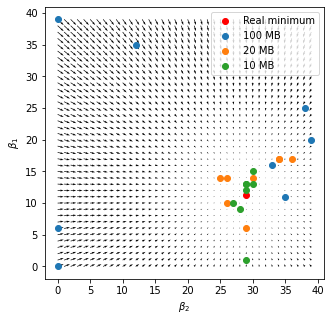

In [251]:
beta = np.arange(0,40,1)
X,Y =np.meshgrid(beta, beta)
flatX, flatY = X.flatten(), Y.flatten()
beta = np.stack((flatX, flatY), axis=0)
ans = nabla(beta, feat_train[:], y_train[:])
xans =  np.reshape(ans[0,:], Y.shape)
yans = np.reshape(ans[1,:], Y.shape)

g=0.5
plt.figure(figsize=(g*10,g*10))
#plt.quiver(X,Y,-xans,-yans)
plt.quiver(Y,X,-yans,-xans)
plt.xlabel(r'$\beta_2$')
plt.ylabel(r'$\beta_1$')
plt.scatter(28.934,11.238 ,color='r', label='Real minimum')
plt.scatter(x_points100, y_points100, label="100 MB")
plt.scatter(x_points20, y_points20, label="20 MB")
plt.scatter(x_points10, y_points10, label="10 MB")
plt.legend()
plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/MBGRADS3D', dpi=300)


In [63]:
importlib.reload(modelos) 
modelADA = modelos.OLS("GD_MB")
modelGD = modelos.OLS("GD")
model = modelos.OLS()

lr = 0.01
lrgd=0.001 #learning rate
momentum = 0.6
epsilon = 0.000001 #error
max_iter=100000#10000 # maximum iterations
epochs=1000
m_batches=10 
tau = lr/100

modelADA.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=0,mode="ADAgrad" )
print("--"*40)
modelGD.fit(feature_matrix=feat_train, y=y_train, gamma=lrgd, epsilon=epsilon, max_iters=max_iter, sigma=momentum )
print("--"*40)
model.fit(feature_matrix=feat_train, y=y_train)

print("--"*40)
print("ADA: ",modelADA.beta)
print("GD:  ",modelGD.beta)
print("INV: ",model.beta)

hola
Time 0.2450571060180664 seconds
1000 epochs done with grad. [-188.85094523   48.96775354  -49.66592792].
--------------------------------------------------------------------------------
Time 0.10752010345458984 seconds
92 iterations done with grad. [-9.46745331e-08  1.40774432e-08 -6.30274144e-08]. 
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
ADA:  [10.45431323 29.63134727  0.74492084]
GD:   [1.14676841e+01 2.99218113e+01 2.18235385e-10]
INV:  [ 1.14676841e+01  2.99218113e+01 -4.88498131e-14]


### Comparision of different learning tuners.

In [70]:
importlib.reload(modelos) 

lr = 0.1

momentum = 0
epsilon = 0.000001 #error
max_iter=100000#10000 # maximum iterations
epochs=1000
m_batches=50 
tau = lr/100

model=modelos.OLS()
modelADA=modelos.OLS("GD_MB")
modelRMS=modelos.OLS("GD_MB")
modelADAM=modelos.OLS("GD_MB")

model.fit(feature_matrix=feat_train, y=y_train, epsilon=epsilon )
#model.fit(feature_matrix=feat_train, y=y_train)
modelADA.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,mode="ADAgrad" )
modelRMS.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,mode="RMSprop" )
modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,mode="ADAM")
#modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=0,mode="ADAM" )
print("--"*40)


with np.printoptions(precision=3, suppress=True):
  
    print("OLS: ", model.beta)
    print("ADA: ",modelADA.beta)
    print("RMS:  ",modelRMS.beta)
    print("ADAM: ", modelADAM.beta)
    #print("INV: ",model.beta)


hola
Time 1.152277946472168 seconds
1000 epochs done with grad. [-270.624227      4.02893291].
Time 1.246847152709961 seconds
1000 epochs done with grad. [ 105.68051726 -266.79456264].
Time 1.1126959323883057 seconds
1000 epochs done with grad. [  28.99748999 -175.3329634 ].
--------------------------------------------------------------------------------
OLS:  [11.238 28.934]
ADA:  [10.51  28.576]
RMS:   [11.955 27.635]
ADAM:  [11.132 28.495]


In the following code we will compute ADAgrad, RMSprop and ADAM for a few learning rates and number of minibatches

In [278]:
lr = [1, 0.1, 0.01]
m_batches = [1]

importlib.reload(modelos) 

mom = 0.6
epsilon = 0.000001 #error
max_iter=100000#10000 # maximum iterations
epochs=100
m_batches=np.array([1, 10, 20, 50]) 
momentum=0
#tau = lr/100

#[learning rate, mini batches, 3 betas, epocas]
ADA_info = np.zeros((len(lr), len(m_batches), 3, epochs))
RMS_info = np.zeros((len(lr), len(m_batches), 3, epochs))
ADAM_info = np.zeros((len(lr), len(m_batches), 3, epochs))

ADA_info_mom = np.zeros((len(lr), len(m_batches), 3, epochs))
RMS_info_mom = np.zeros((len(lr), len(m_batches), 3, epochs))
ADAM_info_mom = np.zeros((len(lr), len(m_batches), 3, epochs))

#model=modelos.OLS()
modelADA=modelos.OLS("GD_MB")
modelRMS=modelos.OLS("GD_MB")
modelADAM=modelos.OLS("GD_MB")

for i, lrval in enumerate(lr):
    for j, mbatch in enumerate(m_batches):
#model.fit(feature_matrix=feat_train, y=y_train, epsilon=epsilon )
        
        modelADA.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=momentum,mode="ADAgrad" )
        modelRMS.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=momentum,mode="RMSprop" )
        modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=momentum,mode="ADAM")
        ADA_info[i,j,:] = modelADA.increment
        RMS_info[i,j,:] = modelRMS.increment
        ADAM_info[i,j,:] = modelADAM.increment


        modelADA.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=mom,mode="ADAgrad" )
        modelRMS.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=mom,mode="RMSprop" )
        modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lrval, epsilon=epsilon, max_iters=max_iter, mb=mbatch, n_epochs=epochs, sigma=mom,mode="ADAM")
        ADA_info_mom[i,j,:] = modelADA.increment
        RMS_info_mom[i,j,:] = modelRMS.increment
        ADAM_info_mom[i,j,:] = modelADAM.increment
 
#modelRMS.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,mode="RMSprop" )
#modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=momentum,mode="ADAM")
#modelADAM.fit(feature_matrix=feat_train, y=y_train, gamma=lr, epsilon=epsilon, max_iters=max_iter, mb=m_batches, n_epochs=epochs, sigma=0,mode="ADAM" )
print("--"*40)

with np.printoptions(precision=3, suppress=True):
  
    #print("OLS: ", model.beta)
    print("ADA: ",modelADA.beta)
    print("RMS:  ",modelRMS.beta)
    print("ADAM: ", modelADAM.beta)


hola
Time 0.21804499626159668 seconds
100 epochs done with grad. [ 397.21204719  445.85755594 1345.52301362].
Time 0.207319974899292 seconds
100 epochs done with grad. [1041.03450647 2068.6171509  1944.3526781 ].
Time 0.13729214668273926 seconds
100 epochs done with grad. [-279.11575613 -629.66891653 -527.44374659].
Time 0.18348193168640137 seconds
100 epochs done with grad. [-1700.47694246   905.78300306 -1615.84400434].
Time 0.17534613609313965 seconds
100 epochs done with grad. [1617.34660085  652.79441285 1848.75743221].
Time 0.15236401557922363 seconds
100 epochs done with grad. [ 286.06284816 -568.34494016  254.07931747].
Time 0.02604222297668457 seconds
100 epochs done with grad. [ 64.30563526 -99.95136386 -72.80406305].
Time 0.027702808380126953 seconds
100 epochs done with grad. [147.62559897 347.13026202 239.10078945].
Time 0.03269004821777344 seconds
100 epochs done with grad. [ 902.58009957 -599.31241426  967.19125283].
Time 0.02527594566345215 seconds
100 epochs done with 

Computing of the value we will use to compute the MSE

In [256]:
model = modelos.OLS()
model.fit(feature_matrix=feat_train, y=y_train)
real = model.beta

We compute the MSE w.r.t the value computed by OLS inverting the matrix.

In [279]:
ADAmse = MSE(ADA_info, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)
RMSmse = MSE(RMS_info, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)
ADAMmse = MSE(ADAM_info, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)

ADAmsemom = MSE(ADA_info_mom, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)
RMSmsemom = MSE(RMS_info_mom, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)
ADAMmsemom = MSE(ADAM_info_mom, real[np.newaxis, np.newaxis,:, np.newaxis], axis=2)

#plt.plot(ADA_info[0,0,2,:])

In [28]:
m_batches=np.array([1, 10, 20]) 

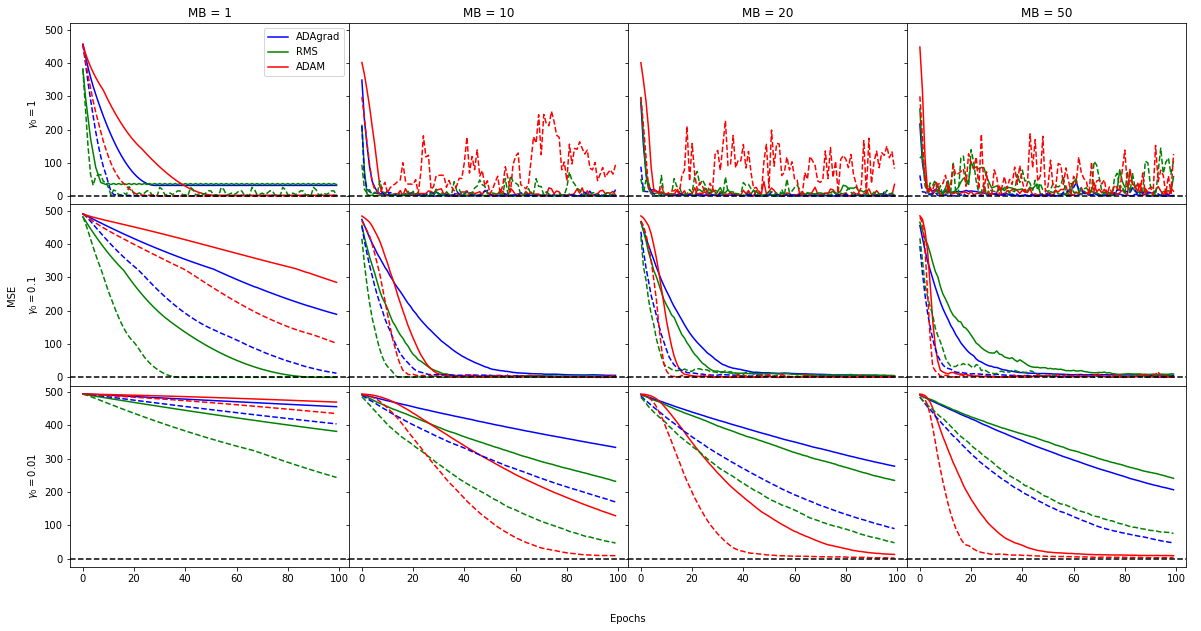

In [297]:
fig, ax = plt.subplots(3,4, figsize=(20,10), sharex=True, sharey=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)


ax[0,0].plot(ADAmse[0,0,:],'b', label="ADAgrad")
ax[0,0].plot(RMSmse[0,0,:], "g-", label="RMS")
ax[0,0].plot(ADAMmse[0,0,:],'r', label="ADAM")
ax[0,0].legend()
ax[1,0].plot(ADAmse[1,0,:], 'b',label="ADAgrad")
ax[1,0].plot(RMSmse[1,0,:], "g-",label="RMS")
ax[1,0].plot(ADAMmse[1,0,:],'r', label="ADAM")

ax[2,0].plot(ADAmse[2,0,:],'b', label="ADAgrad")
ax[2,0].plot(RMSmse[2,0,:], "g-",label="RMS")
ax[2,0].plot(ADAMmse[2,0,:], 'r',label="ADAM")




ax[0,1].plot(ADAmse[0,1,:],'b', label="ADAgrad")
ax[0,1].plot(RMSmse[0,1,:], "g-",label="RMS")
ax[0,1].plot(ADAMmse[0,1,:], 'r',label="ADAM")

ax[1,1].plot(ADAmse[1,1,:], 'b',label="ADAgrad")
ax[1,1].plot(RMSmse[1,1,:], "g-",label="RMS")
ax[1,1].plot(ADAMmse[1,1,:], 'r',label="ADAM")

ax[2,1].plot(ADAmse[2,1,:],'b', label="ADAgrad")
ax[2,1].plot(RMSmse[2,1,:], "g-",label="RMS")
ax[2,1].plot(ADAMmse[2,1,:], 'r',label="ADAM")


ax[0,2].plot(ADAmse[0,2,:],'b', label="ADAgrad")
ax[0,2].plot(RMSmse[0,2,:], "g-",label="RMS")
ax[0,2].plot(ADAMmse[0,2,:], 'r',label="ADAM")

ax[1,2].plot(ADAmse[1,2,:], 'b',label="ADAgrad")
ax[1,2].plot(RMSmse[1,2,:], "g-",label="RMS")
ax[1,2].plot(ADAMmse[1,2,:], 'r',label="ADAM")

ax[2,2].plot(ADAmse[2,2,:],'b', label="ADAgrad")
ax[2,2].plot(RMSmse[2,2,:], "g-",label="RMS")
ax[2,2].plot(ADAMmse[2,2,:], 'r',label="ADAM")


ax[0,3].plot(ADAmse[0,3,:],'b', label="ADAgrad")
ax[0,3].plot(RMSmse[0,3,:], "g-",label="RMS")
ax[0,3].plot(ADAMmse[0,3,:], 'r',label="ADAM")

ax[1,3].plot(ADAmse[1,3,:], 'b',label="ADAgrad")
ax[1,3].plot(RMSmse[1,3,:], "g-",label="RMS")
ax[1,3].plot(ADAMmse[1,3,:], 'r',label="ADAM")

ax[2,3].plot(ADAmse[2,3,:],'b', label="ADAgrad")
ax[2,3].plot(RMSmse[2,3,:], "g-",label="RMS")
ax[2,3].plot(ADAMmse[2,3,:], 'r',label="ADAM")


ax[0,0].set_title("MB = {}".format(m_batches[0]))
ax[0,1].set_title("MB = {}".format(m_batches[1]))
ax[0,2].set_title("MB = {}".format(m_batches[2]))
ax[0,3].set_title("MB = {}".format(m_batches[3]))

ax[0,0].set_ylabel("$\gamma_0 = {}$".format(lr[0]))
ax[1,0].set_ylabel("$\gamma_0 = {}$".format(lr[1]))
ax[2,0].set_ylabel("$\gamma_0 = {}$".format(lr[2]))

ax[0,0].plot(ADAmsemom[0,0,:],"b--", label="ADAgrad")
ax[0,0].plot(RMSmsemom[0,0,:], "g--", label="RMS")
ax[0,0].plot(ADAMmsemom[0,0,:],"r--", label="ADAM")

ax[1,0].plot(ADAmsemom[1,0,:],"b--",label="ADAgrad")
ax[1,0].plot(RMSmsemom[1,0,:],"g--",label="RMS")
ax[1,0].plot(ADAMmsemom[1,0,:],"r--", label="ADAM")

ax[2,0].plot(ADAmsemom[2,0,:],"b--", label="ADAgrad")
ax[2,0].plot(RMSmsemom[2,0,:],"g--",label="RMS")
ax[2,0].plot(ADAMmsemom[2,0,:],"r--", label="ADAM")





ax[0,1].plot(ADAmsemom[0,1,:],"b--", label="ADAgrad")
ax[0,1].plot(RMSmsemom[0,1,:],"g--",label="RMS")
ax[0,1].plot(ADAMmsemom[0,1,:],"r--", label="ADAM")

ax[1,1].plot(ADAmsemom[1,1,:],"b--", label="ADAgrad")
ax[1,1].plot(RMSmsemom[1,1,:],"g--",label="RMS")
ax[1,1].plot(ADAMmsemom[1,1,:],"r--", label="ADAM")

ax[2,1].plot(ADAmsemom[2,1,:],"b--",label="ADAgrad")
ax[2,1].plot(RMSmsemom[2,1,:], "g--",label="RMS")
ax[2,1].plot(ADAMmsemom[2,1,:],"r--", label="ADAM")


ax[0,2].plot(ADAmsemom[0,2,:],"b--",label="ADAgrad")
ax[0,2].plot(RMSmsemom[0,2,:], "g--",label="RMS")
ax[0,2].plot(ADAMmsemom[0,2,:],"r--", label="ADAM")

ax[1,2].plot(ADAmsemom[1,2,:],"b--",label="ADAgrad")
ax[1,2].plot(RMSmsemom[1,2,:], "g--",label="RMS")
ax[1,2].plot(ADAMmsemom[1,2,:],"r--", label="ADAM")

ax[2,2].plot(ADAmsemom[2,2,:],"b--", label="ADAgrad")
ax[2,2].plot(RMSmsemom[2,2,:], "g--",label="RMS")
ax[2,2].plot(ADAMmsemom[2,2,:],"r--", label="ADAM")


ax[0,3].plot(ADAmsemom[0,3,:],"b--", label="ADAgrad")
ax[0,3].plot(RMSmsemom[0,3,:], "g--",label="RMS")
ax[0,3].plot(ADAMmsemom[0,3,:],"r--", label="ADAM")

ax[1,3].plot(ADAmsemom[1,3,:],"b--", label="ADAgrad")
ax[1,3].plot(RMSmsemom[1,3,:], "g--",label="RMS")
ax[1,3].plot(ADAMmsemom[1,3,:],"r--", label="ADAM")

ax[2,3].plot(ADAmsemom[2,3,:],"b--",label="ADAgrad")
ax[2,3].plot(RMSmsemom[2,3,:], "g--",label="RMS")
ax[2,3].plot(ADAMmsemom[2,3,:],"r--", label="ADAM")


xticks = np.arange(0,110,20)

ax[2,0].set_xticks(xticks)
for i in range(3):
    for j in range(4):
        ax[i, j].axhline( y=0, color="k", linestyle="--")

fig.subplots_adjust(wspace=0, hspace=0)
plt.xlabel('Epochs',labelpad=30)
plt.ylabel('MSE',labelpad=30)

plt.savefig('/Users/ijpoquet/PhD/PhD/CompSci_Course/plots/MethodsADAM', dpi=300)